In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
# !pip install opencv-python

In [3]:
import cv2  

# Open_Cv (Open source computer vision)

In [4]:
fg = cv2.imread(r'''D:\DSAI-April\Opencv\images\petal.jpg''', 1) #RGB=1 Greyscale=0
cv2.imshow('iu', fg)
cv2.waitKey() # wait for milisecond
cv2.destroyAllWindows()


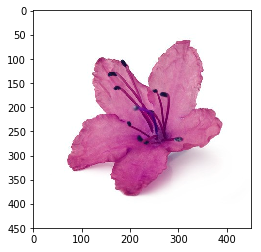

In [5]:
plt.imshow(fg)
plt.show()

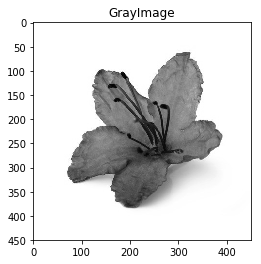

In [6]:
# Color changing
gray = cv2.cvtColor(fg, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray') #cmap le original gray ma lanxa
plt.title('GrayImage')
plt.show()

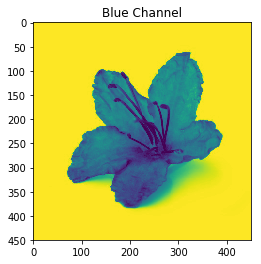

In [7]:
# lets see image channels

red = fg[:,:,1] 
cv2.imshow('red', red)
cv2.waitKey() # wait for milisecond
cv2.destroyAllWindows()

plt.imshow(red) # still in BGR format
plt.title('Blue Channel')
plt.show()

In [8]:
small_fg=cv2.resize(fg, (5,5))
big_fg=cv2.resize(fg,None,fx=0.5,fy=0.5)
cv2.imshow('red', big_fg)
cv2.waitKey() # wait for milisecond
cv2.destroyAllWindows()
# plt.imshow(big_fg)

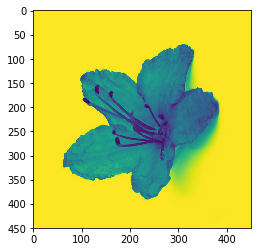

In [9]:
plt.imshow(fg)
plt.imshow(gray.T)

In [16]:
image= cv2.imread(r'''D:\DSAI-April\Opencv\images\coin.png''', 0)

In [64]:
# kernel=np.array([[-1,-1,-1],
#                [-1,8,-1],
#                [-1,-1,-1]])/9
kernel1=np.ones((3,3))/9
print(kernel1)

In [68]:
filtered= cv2.filter2D(image,-1,kernel1)

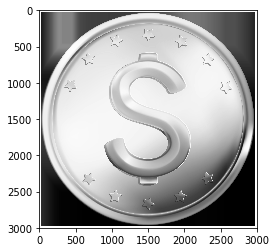

In [69]:
plt.imshow(filtered, cmap='gray')  #stagnography

In [73]:
kernel2=np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]]) #Sobel x fillter yesle vertical lai matra detect garxa

In [74]:
filtered= cv2.filter2D(image,-1,kernel2)

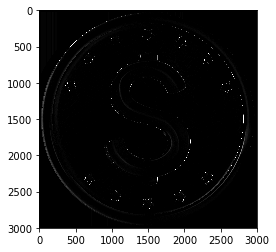

In [76]:
plt.imshow(filtered, cmap='gray')

In [79]:
flag= cv2.imread(r'''D:\DSAI-April\Opencv\images\flag.jpg''', 0)

In [88]:
filtered= cv2.filter2D(flag,-1,kernel2.T) #Transform garya. .T hatayo vane vertical matra detect garya aaxa
KernelSum=kernel2.T+kernel2

In [89]:
filtered= cv2.filter2D(flag,-1,KernelSum) #Kernel Sum gare paxi horizontal ra Vertical dubai aauxa Natra ki Vertical matra garxa ki horizontal matra

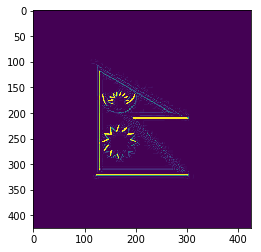

In [90]:
plt.imshow(filtered)

In [91]:
blur_img=cv2.imread(r'''D:\DSAI-April\Opencv\images\noise.png''', 0)

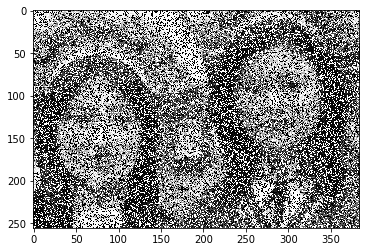

In [94]:
plt.imshow(blur_img, cmap='gray')

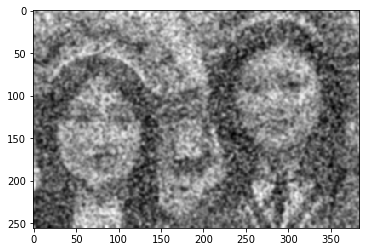

In [140]:
kernel = np.ones([3,3])/9
# filtered = cv2.filter2D(blur_img, -1, kernel)
# plt.imshow(filtered, cmap='gray')

# blurred1 = cv2.blur(blur_img, (5, 5))
# plt.imshow(blurred1, cmap='gray')

blurred2 = cv2.GaussianBlur(blur_img, (7,7), -1)
plt.imshow(blurred2, cmap='gray')

# blurred = cv2.medianBlur(blur_img, 5)
# plt.imshow(blurred, cmap='gray')


# Thres Holding

In [132]:
flaag=cv2.imread(r'''D:\DSAI-April\Opencv\images\flag.jpg''', 0)

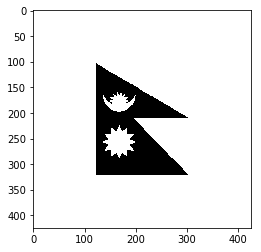

In [143]:
retval, thresh = cv2.threshold(flaag, 100, 200,cv2.THRESH_OTSU) #200 max value...
plt.imshow(thresh,cmap='gray')

In [144]:
petal=cv2.imread(r'''D:\DSAI-April\Opencv\images\petal.jpg''', 0)

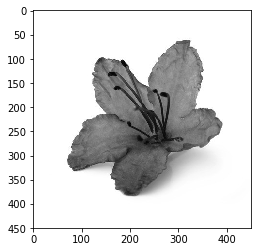

In [146]:
plt.imshow(petal,cmap='gray')

In [160]:
petal=cv2.imread(r'''D:\DSAI-April\Opencv\images\flag.jpg''', 0)

In [ ]:
durbar=cv2.imread(r'''D:\DSAI-April\Opencv\images\durbar.jpg''', 0)

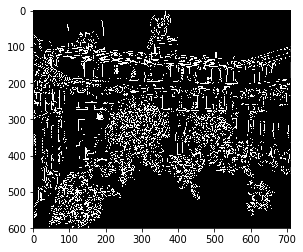

In [168]:
low = 10
high = 250


canny_img = cv2.Canny(durbar, low, high)

plt.imshow(canny_img, cmap='gray')

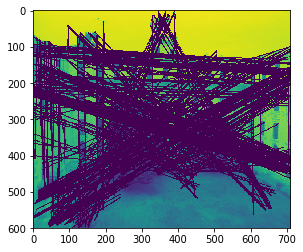

In [169]:
#Hough Transform

rho = 1
theta = np.pi / 180
threshold = 60
max_line_length = 50
max_line_gap = 50


lines = cv2.HoughLinesP(canny_img, rho, theta, threshold, np.array([]), max_line_length, max_line_gap)

line_img = durbar.copy() #original photo ma draw garya
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(line_img)

In [170]:
print(lines)

[[[  0 124 346 142]]

 [[  0 148 709 464]]

 [[ 34 114 708 149]]

 ...

 [[602 520 660 548]]

 [[329 357 329  15]]

 [[ 56 561 505 112]]]


# Face detection from Open CV

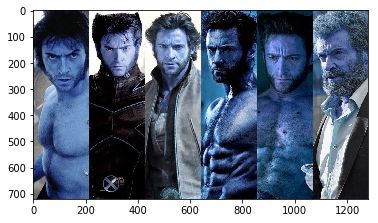

In [175]:
xmen=cv2.imread(r'''D:\DSAI-April\Opencv\images\xmen.jpg''', 1)
plt.imshow(xmen)

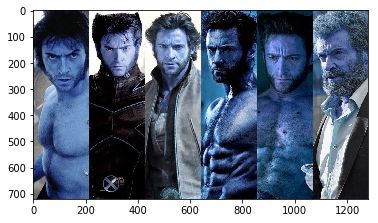

In [177]:
gray = cv2.cvtColor(xmen, cv2.COLOR_BGR2GRAY)
plt.imshow(xmen)

In [178]:
# D:\Anaconda\Lib\site-packages\cv2\data ma hunxa detect garne

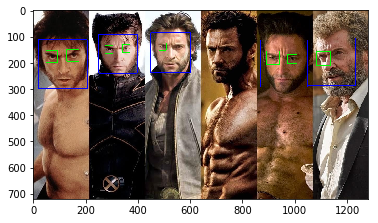

In [189]:
cascade_dir = "D:\Anaconda\Lib\site-packages\cv2\data/"
face_cascade = cv2.CascadeClassifier(cascade_dir + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cascade_dir + 'haarcascade_eye.xml')

# find bounding box coordinates of faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# loop through each faces and draw a rectangle
for (x,y,w,h) in faces:
    xmen = cv2.rectangle(xmen,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = xmen[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(cv2.cvtColor(xmen, cv2.COLOR_BGR2RGBA))
